In [1]:
import numpy as np
import xarray as xr
import os
import glob
from pathlib import Path 
import pathlib
from pprint import pprint
import matplotlib.pyplot as plt
import time
import requests
import s3fs
from os.path import dirname, join
import datetime
import myDate
import netCDF4

import cartopy.crs as ccrs
import cartopy.feature as cfeature
import warnings
warnings.filterwarnings('ignore')

In [2]:
input_dir = Path('/home/jovyan/Data/ECCO_GMSL/GMSL/')
fig_dir = Path('/home/jovyan/Figures/ECCO_GMSL/')

In [3]:
ECCO_global_mean_sea_level=xr.open_dataset(str(Path('/home/jovyan/Data/ECCO_GMSL/GMSL/')) + '/GMSL_ECCO_dailyfiles_19922017.nc')
ECCO_global_mean_sea_level_all=xr.open_dataset(str(Path('/home/jovyan/Data/ECCO_GMSL/GMSL/')) + '/GMSL_ECCO_dailyfiles_19922017_alllat.nc')
ECCO_global_mean_sea_level_old=xr.open_dataset(str(Path('/home/jovyan/Data/ECCO_GMSL/GMSL/')) + '/GMSL_ECCO_dailyfiles_19922017_old.nc')
ECCO_global_mean_sea_level_all_old=xr.open_dataset(str(Path('/home/jovyan/Data/ECCO_GMSL/GMSL/')) + '/GMSL_ECCO_dailyfiles_19922017_alllat_old.nc')
ECCO_global_mean_sea_level_old_old=xr.open_dataset(str(Path('/home/jovyan/Data/ECCO_GMSL/GMSL_old/')) + '/GMSL_ECCO_dailyfiles_19922017_alllat.nc')
ECCO_global_mean_sea_level_all_old_old=xr.open_dataset(str(Path('/home/jovyan/Data/ECCO_GMSL/GMSL_old/')) + '/GMSL_ECCO_dailyfiles_19922017_alllat.nc')
ECCO_global_mean_sea_level_nosicapplied=xr.open_dataset(str(Path('/home/jovyan/Data/ECCO_GMSL/GMSL/')) + '/GMSL_ECCO_dailyfiles_19922017_nosicapplied.nc')
ECCO_global_mean_sea_level_all_nosicapplied=xr.open_dataset(str(Path('/home/jovyan/Data/ECCO_GMSL/GMSL/')) + '/GMSL_ECCO_dailyfiles_19922017_alllat_nosicapplied.nc')

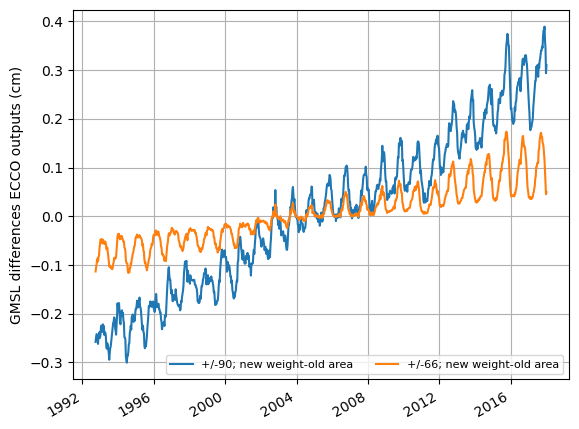

In [14]:
fig=plt.figure()
(ECCO_global_mean_sea_level_all.gmsl_ecco*10**2-ECCO_global_mean_sea_level_all_old.gmsl_ecco*10**2).plot(label='+/-90; new weight-old area')
(ECCO_global_mean_sea_level.gmsl_ecco*10**2-ECCO_global_mean_sea_level_old.gmsl_ecco*10**2).plot(label='+/-66; new weight-old area')
plt.grid()
plt.title('')
plt.ylabel('GMSL differences ECCO outputs (cm)')
plt.xlabel('')
plt.legend(ncol=2, loc='lower right',fontsize=8)
# plt.savefig(fig_dir / 'GMSL_ecco_output_oldvsnewweights.png',dpi=200,transparent=False,facecolor='white')

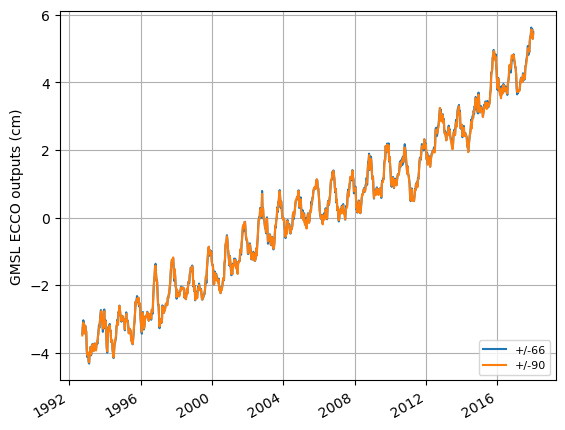

In [15]:
fig=plt.figure()
(ECCO_global_mean_sea_level.gmsl_ecco*10**2).plot(label='+/-66');
(ECCO_global_mean_sea_level_all.gmsl_ecco*10**2).plot(label='+/-90');
plt.grid()
plt.ylabel('GMSL ECCO outputs (cm)')
plt.xlabel('')
plt.legend(ncol=1, loc='lower right',fontsize=8)
# plt.savefig(fig_dir / 'GMSL_ecco_output_66_alllat.png',dpi=200,transparent=False,facecolor='white')

In [ ]:
fig=plt.figure()
(ECCO_global_mean_sea_level_all_nosicapplied.gmsl_ecco*10**2-ECCO_global_mean_sea_level_nosicapplied.gmsl_ecco*10**2).plot(label='+/-90 minus +/-66; no sic applied')
(ECCO_global_mean_sea_level_all.gmsl_ecco*10**2-ECCO_global_mean_sea_level.gmsl_ecco*10**2).plot(label='+/-90 minus +/-66; sic applied')
plt.grid()
plt.ylabel('GMSL ECCO outputs (cm)')
plt.xlabel('')
plt.legend(ncol=1, loc='lower left',fontsize=8)
# plt.savefig(fig_dir / 'GMSL_ecco_output_66_alllat.png',dpi=200,transparent=False,facecolor='white')

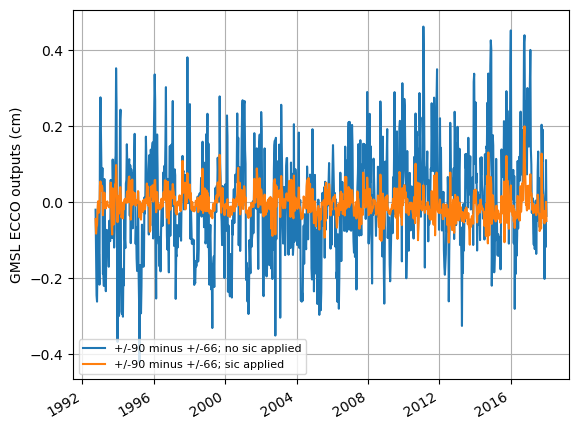

In [22]:
fig=plt.figure()
(ECCO_global_mean_sea_level_all_nosicapplied.gmsl_ecco*10**2-ECCO_global_mean_sea_level_nosicapplied.gmsl_ecco*10**2).plot(label='+/-90 minus +/-66; no sic applied')
(ECCO_global_mean_sea_level_all.gmsl_ecco*10**2-ECCO_global_mean_sea_level.gmsl_ecco*10**2).plot(label='+/-90 minus +/-66; sic applied')
plt.grid()
plt.ylabel('GMSL ECCO outputs (cm)')
plt.xlabel('')
plt.legend(ncol=1, loc='lower left',fontsize=8)
# plt.savefig(fig_dir / 'GMSL_ecco_output_66_alllat.png',dpi=200,transparent=False,facecolor='white')

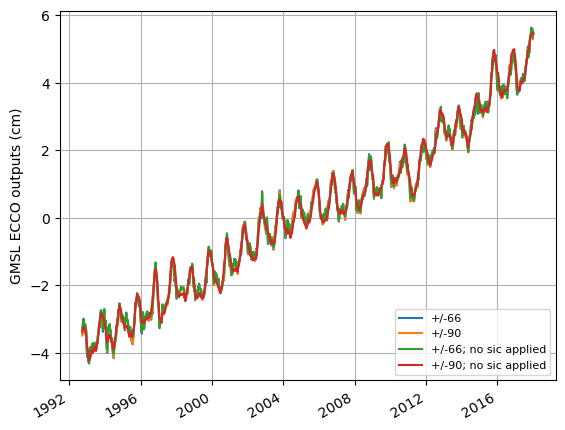

In [18]:
fig=plt.figure()
(ECCO_global_mean_sea_level.gmsl_ecco*10**2).plot(label='+/-66');
(ECCO_global_mean_sea_level_all.gmsl_ecco*10**2).plot(label='+/-90');
(ECCO_global_mean_sea_level_nosicapplied.gmsl_ecco*10**2).plot(label='+/-66; no sic applied');
(ECCO_global_mean_sea_level_all_nosicapplied.gmsl_ecco*10**2).plot(label='+/-90; no sic applied');
plt.grid()
plt.ylabel('GMSL ECCO outputs (cm)')
plt.xlabel('')
plt.legend(ncol=1, loc='lower right',fontsize=8)

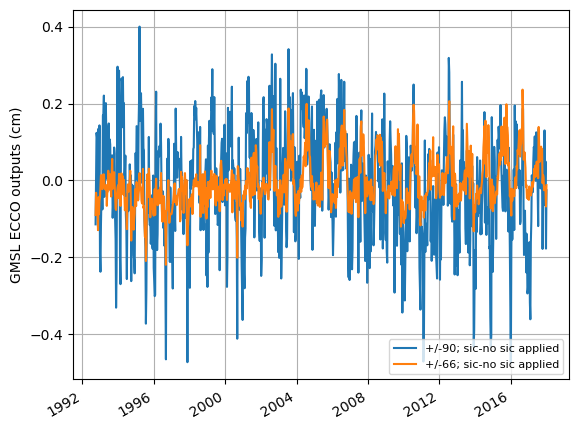

In [20]:
fig=plt.figure()
(ECCO_global_mean_sea_level_all.gmsl_ecco*10**2-ECCO_global_mean_sea_level_all_nosicapplied.gmsl_ecco*10**2).plot(label='+/-90; sic-no sic applied');
(ECCO_global_mean_sea_level.gmsl_ecco*10**2-ECCO_global_mean_sea_level_nosicapplied.gmsl_ecco*10**2).plot(label='+/-66; sic-no sic applied');
plt.grid()
plt.ylabel('GMSL ECCO outputs (cm)')
plt.xlabel('')
plt.legend(ncol=1, loc='lower right',fontsize=8)